In [21]:
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization,MaxPooling2D
from keras.layers import Conv2D, MaxPool2D
from keras.layers.advanced_activations import ELU
import os
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

defining some variables to make life easier

In [2]:
num_classes = 20
img_rows, img_cols = 224, 224
batch_size = 16

In [3]:

train_samples = 19548
validation_samples = 990
epochs = 20

## Explaining the data :

this dataset contain 20 characters from the Simpsons animated series

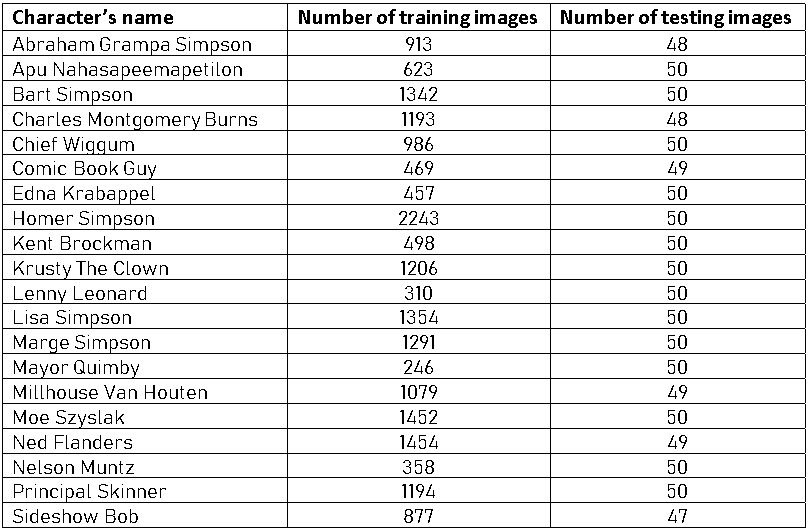

## data loading :

In [4]:
train_data_dir = r'/content/drive/MyDrive/simpsons/train'
validation_data_dir = r'/content/drive/MyDrive/simpsons/validation'

In [5]:
# loading and applying data augmentation to the training images
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

In [6]:
# loading and only rescalling the validation images
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 19545 images belonging to 20 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 990 images belonging to 20 classes.


defining the classes for the characters

In [9]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


In [10]:
classes

['abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'comic_book_guy',
 'edna_krabappel',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lisa_simpson',
 'marge_simpson',
 'mayor_quimby',
 'milhouse_van_houten',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'principal_skinner',
 'sideshow_bob']

## basic model :* **failed trial**

implementing some basic model architecture 

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Input([img_rows, img_cols,3]),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same') ,
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    
                                    tf.keras.layers.Conv2D(256, (3, 3), activation='relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    
                                    tf.keras.layers.Conv2D(512, (3, 3), activation='relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(num_classes,activation=tf.nn.softmax)


])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [ ]:
model.compile(optimizer='Adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['acc'])

In [ ]:
 model.fit_generator(
    train_generator,
    steps_per_epoch = train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_samples // batch_size)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1221/1221 [==============================] - 9757s 8s/step - loss: 2.8986 - acc: 0.1070 - val_loss: 3.1954 - val_acc: 0.0512
Epoch 2/20
1221/1221 [==============================] - 3150s 3s/step - loss: 2.8736 - acc: 0.1135 - val_loss: 3.1186 - val_acc: 0.0512
Epoch 3/20
1221/1221 [==============================] - 3105s 3s/step - loss: 2.8682 - acc: 0.1180 - val_loss: 3.1619 - val_acc: 0.0502
Epoch 4/20
1221/1221 [==============================] - 3133s 3s/step - loss: 2.8728 - acc: 0.1138 - val_loss: 3.1363 - val_acc: 0.0512
Epoch 5/20
1221/1221 [==============================] - 3106s 3s/step - loss: 2.8686 - acc: 0.1174 - val_loss: 3.1336 - val_acc: 0.0502
Epoch 6/20
  51/1221 [>.............................] - ETA: 48:33 - loss: 2.9062 - acc: 0.0962

KeyboardInterrupt: ignored

## enhanced model :

implementing an advanced model architecture

In [ ]:
new_model = Sequential()
new_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(img_rows,img_cols,3)))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(Conv2D(64, (3, 3)))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Dropout(0.5))

new_model.add(Conv2D(256, (3, 3), padding='same')) 
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(Conv2D(256, (3, 3)))

new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Dropout(0.3))

new_model.add(Flatten())
new_model.add(Dense(512))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(Dropout(0.5))

new_model.add(Flatten())
new_model.add(Dense(256))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(Dropout(0.5))

new_model.add(Dense(num_classes, activation='softmax'))
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_7 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 222, 222, 64)      36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 222, 222, 64)      256       
_________________________________________________________________
activation_3 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 64)     

In [ ]:
new_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
new_model.fit_generator(
    train_generator,
    steps_per_epoch = train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1221/1221 [==============================] - 416s 339ms/step - loss: 3.0076 - accuracy: 0.1494 - val_loss: 2.2478 - val_accuracy: 0.3350
Epoch 2/20
1221/1221 [==============================] - 415s 339ms/step - loss: 2.3636 - accuracy: 0.2857 - val_loss: 1.9654 - val_accuracy: 0.4191
Epoch 3/20
1221/1221 [==============================] - 413s 338ms/step - loss: 2.1021 - accuracy: 0.3656 - val_loss: 1.8296 - val_accuracy: 0.4816
Epoch 4/20
1221/1221 [==============================] - 410s 335ms/step - loss: 1.9379 - accuracy: 0.4126 - val_loss: 1.5804 - val_accuracy: 0.5225
Epoch 5/20
1221/1221 [==============================] - 408s 334ms/step - loss: 1.8448 - accuracy: 0.4533 - val_loss: 1.5171 - val_accuracy: 0.5502
Epoch 6/20
1221/1221 [==============================] - 401s 329ms/step - loss: 1.7118 - accuracy: 0.4860 - val_loss: 1.5326 - val_accuracy: 0.5451
Epoch 7/20
1221/1221 [==============================] - 399s 327ms/step - loss: 1.6229 - accuracy: 0.5107 - val_

## Transfer Learning :

### manual VGGG16 :

writting the VGG16 from scratch

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(img_rows, img_cols,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics = ['accuracy'])


In [ ]:
 model.fit_generator(
    train_generator,
    steps_per_epoch = train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_samples // batch_size)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1221/1221 [==============================] - 10777s 9s/step - loss: 3.3367 - accuracy: 0.1631 - val_loss: 2.7030 - val_accuracy: 0.3770
Epoch 2/20
1221/1221 [==============================] - 378s 309ms/step - loss: 1.6498 - accuracy: 0.5118 - val_loss: 1.5773 - val_accuracy: 0.5430
Epoch 3/20
1221/1221 [==============================] - 376s 308ms/step - loss: 1.0757 - accuracy: 0.6877 - val_loss: 1.1254 - val_accuracy: 0.6516
Epoch 4/20
1221/1221 [==============================] - 380s 311ms/step - loss: 0.8493 - accuracy: 0.7546 - val_loss: 1.1566 - val_accuracy: 0.6814
Epoch 5/20
1221/1221 [==============================] - 378s 310ms/step - loss: 0.7009 - accuracy: 0.7962 - val_loss: 1.0241 - val_accuracy: 0.7203
Epoch 6/20
1221/1221 [==============================] - 378s 309ms/step - loss: 0.6573 - accuracy: 0.8130 - val_loss: 0.7669 - val_accuracy: 0.7592
Epoch 7/20
1221/1221 [==============================] - 380s 311ms/step - loss: 0.5940 - accuracy: 0.8314 - val_l

In [ ]:
model.save('/content/drive/MyDrive/simpsons/vgg16_model.h5')

#### Performance Analysis :

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[44  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0 49  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 46  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 48  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0  0  0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  0 48  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 2  0  0  0  0  0  0 48  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0 47  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 48  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0 44  0  2  0  1  0  1]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.96      0.92      0.94        48
  apu_nahasapeemapetilon       1.00      0.98      0.99        50
            bart_simpson       0.98      0.98      0.98        50
charles_montgomery_burns       1.00      0.96      0.98        48
            chief_wiggum       0.98      0.96      0.97        50
          comic_book_guy       0.90      0.96      0.93        49
          edna_krabappel       1.00      0.96      0.98        50
           homer_simpson       0.89      0.96      0.92        50
           kent_brockman       0.98      1.00      0.99        50
        krusty_the_clown       0.98      1.00      0.99        50
           lenny_leonard       1.00      0.94      0.97        50
            lisa_simpson       1.00      0.96      0.98        50
           marge_simpson       0.98      1.00      0.99        50
            mayor_quimby       1.00      0.88      0.

In [ ]:
plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

<Figure size 576x576 with 0 Axes>

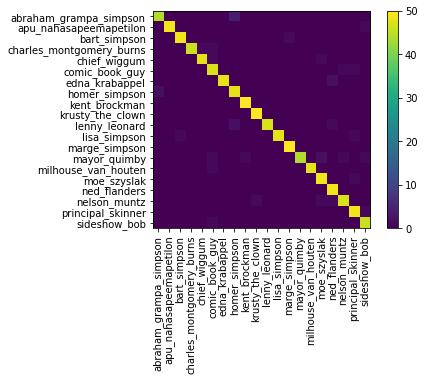

In [ ]:
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

### VGG16 :*  **failed trial**  


"weights=None"

In [ ]:
VGG_model = tf.keras.applications.VGG16(include_top=False, input_shape=[img_rows,img_cols,3], weights=None)

In [ ]:
new_VGG_model = tf.keras.Sequential([VGG_model])
new_VGG_model.add(Flatten())
new_VGG_model.add(Dense(units=4096,activation="relu"))
new_VGG_model.add(Dropout(0.5))
new_VGG_model.add(Dense(units=4096,activation="relu"))
new_VGG_model.add(Dropout(0.5))
new_VGG_model.add(Dense(num_classes, activation="softmax"))

In [ ]:
new_VGG_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              102764544 
_________________________________________________________________
dropout_4 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_5 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)               

In [ ]:
new_VGG_model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics = ['accuracy'])


In [ ]:
new_VGG_model.fit_generator(
    train_generator,
    steps_per_epoch = train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_samples // batch_size)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1221/1221 [==============================] - 358s 293ms/step - loss: 2.8899 - accuracy: 0.1079 - val_loss: 3.1255 - val_accuracy: 0.0512
Epoch 2/20
1221/1221 [==============================] - 357s 292ms/step - loss: 2.8708 - accuracy: 0.1150 - val_loss: 3.1464 - val_accuracy: 0.0512
Epoch 3/20
 302/1221 [======>.......................] - ETA: 4:27 - loss: 2.8726 - accuracy: 0.1157

KeyboardInterrupt: ignored

### VGG16 :*  **failed trial**  


"weights=imagnet"

In [38]:
base_model = tf.keras.applications.VGG16(include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [39]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [40]:
len(base_model.layers)

19

In [41]:
#  fine-tuning
for layer in base_model.layers[:14]:
  layer.trainable=False
for layer in base_model.layers[14:]:
  layer.trainable=True

In [42]:
input_layer = tf.keras.layers.Input([img_rows,img_cols,3])

In [43]:
x = base_model(input_layer, training=False)
x = tf.keras.layers.Flatten()(x)
output_layer = tf.keras.layers.Dense(num_classes,activation=tf.nn.softmax)(x)
new_model = tf.keras.Model(input_layer,output_layer)

In [44]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                501780    
Total params: 15,216,468
Trainable params: 7,581,204
Non-trainable params: 7,635,264
_________________________________________________________________


In [45]:
new_model.compile(optimizer='Adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['acc'])

In [47]:
new_model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
1222/1222 [==============================] - 9736s 8s/step - loss: 2.9296 - acc: 0.1129 - val_loss: 3.0515 - val_acc: 0.0505
Epoch 2/20
1222/1222 [==============================] - 365s 299ms/step - loss: 2.8737 - acc: 0.1148 - val_loss: 3.1031 - val_acc: 0.0505
Epoch 3/20
1222/1222 [==============================] - 366s 300ms/step - loss: 2.8663 - acc: 0.1148 - val_loss: 3.1284 - val_acc: 0.0505
Epoch 4/20
1222/1222 [==============================] - 365s 299ms/step - loss: 2.8651 - acc: 0.1148 - val_loss: 3.1401 - val_acc: 0.0505
Epoch 5/20
1222/1222 [==============================] - 364s 298ms/step - loss: 2.8648 - acc: 0.1148 - val_loss: 3.1447 - val_acc: 0.0505
Epoch 6/20
1222/1222 [==============================] - 364s 298ms/step - loss: 2.8647 - acc: 0.1148 - val_loss: 3.1476 - val_acc: 0.0505
Epoch 7/20
1222/1222 [==============================] - 364s 298ms/step - loss: 2.8647 - acc: 0.1148 - val_loss: 3.1508 - val_acc: 0.0505
Epoch 8/20
1222/1222 [==============

KeyboardInterrupt: ignored

### ResNet50 model: **best model**
with freezing

In [ ]:
ResNet50_model = tf.keras.applications.ResNet50(weights='imagenet')

In [ ]:
# removing the top of the model
output = ResNet50_model.layers[-2].output
base_model = keras.Model(ResNet50_model.input, output)

In [ ]:
ResNet50_model = keras.Model(base_model.input, base_model.output)

In [ ]:
ResNet50_model.trainable = False

In [ ]:

new_ResNet50_model = tf.keras.Sequential([ResNet50_model,
                                          tf.keras.layers.Flatten(),
                                          tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu),
                                          tf.keras.layers.Dropout(0.4),
                                          tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

In [ ]:
new_ResNet50_model.compile(optimizer=Adam(lr=1e-4), loss= tf.losses.CategoricalCrossentropy(), metrics=['acc'])

In [ ]:
new_ResNet50_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 2048)              23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                10260     
Total params: 24,647,060
Trainable params: 24,593,940
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
new_ResNet50_model.fit(train_generator,
    steps_per_epoch = train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_samples // batch_size )

Epoch 1/20
1221/1221 [==============================] - 361s 291ms/step - loss: 1.0703 - acc: 0.7018 - val_loss: 0.2871 - val_acc: 0.9150
Epoch 2/20
1221/1221 [==============================] - 355s 291ms/step - loss: 0.2626 - acc: 0.9280 - val_loss: 0.5472 - val_acc: 0.8914
Epoch 3/20
1221/1221 [==============================] - 353s 289ms/step - loss: 0.2075 - acc: 0.9431 - val_loss: 0.1059 - val_acc: 0.9662
Epoch 4/20
1221/1221 [==============================] - 352s 288ms/step - loss: 0.1746 - acc: 0.9532 - val_loss: 0.2500 - val_acc: 0.9518
Epoch 5/20
1221/1221 [==============================] - 357s 293ms/step - loss: 0.1461 - acc: 0.9617 - val_loss: 0.2374 - val_acc: 0.9508
Epoch 6/20
1221/1221 [==============================] - 359s 294ms/step - loss: 0.1354 - acc: 0.9636 - val_loss: 0.1813 - val_acc: 0.9436
Epoch 7/20
1221/1221 [==============================] - 356s 291ms/step - loss: 0.1244 - acc: 0.9661 - val_loss: 0.1513 - val_acc: 0.9590
Epoch 8/20
1221/1221 [============

In [ ]:
new_ResNet50_model.save('/content/drive/MyDrive/simpsons/ResNet50_model.h5')

### Xception model :

In [ ]:
Xception_model = tf.keras.applications.Xception(include_top=False, input_shape=[img_rows, img_cols4,3])

In [ ]:
Xception_model.trainable = False

In [ ]:

new_xception_model = tf.keras.Sequential([Xception_model,
                                          tf.keras.layers.Flatten(),
                                          tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu),
                                          tf.keras.layers.Dropout(0.4),
                                          tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

In [ ]:
new_xception_model.compile(optimizer='Adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['acc'])

In [ ]:
new_xception_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 43)                22059     
Total params: 72,264,275
Trainable params: 51,402,795
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
new_xception_model.fit(train_generator,epochs=5)

Epoch 1/5
1309/1309 [==============================] - 566s 426ms/step - batch: 654.0000 - size: 31.9832 - loss: 8.0549 - acc: 0.4997
Epoch 2/5
1309/1309 [==============================] - 560s 428ms/step - batch: 654.0000 - size: 31.9832 - loss: 8.0582 - acc: 0.5000
Epoch 3/5
1309/1309 [==============================] - 559s 427ms/step - batch: 654.0000 - size: 31.9832 - loss: 8.0590 - acc: 0.5000
Epoch 4/5
1309/1309 [==============================] - 559s 427ms/step - batch: 654.0000 - size: 31.9832 - loss: 8.0616 - acc: 0.5000
Epoch 5/5
1309/1309 [==============================] - 557s 426ms/step - batch: 654.0000 - size: 31.9832 - loss: 8.0574 - acc: 0.5000


# predicting images :

by running these cells the model will predict any given image - **just paste the path of the image in the form field**

In [28]:
def read_images(image_path):
    #Reads and outputs the entire contents of the input filename.
    img_str=tf.io.read_file(image_path)
    img = tf.image.decode_image(img_str,channels=3)

    #This will convert to float values in [0, 1]
    img = tf.image.convert_image_dtype(img, tf.float32)
    img=tf.image.resize(img,[224,224])
    return img

In [29]:
classes = ['abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'comic_book_guy',
 'edna_krabappel',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lisa_simpson',
 'marge_simpson',
 'mayor_quimby',
 'milhouse_van_houten',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'principal_skinner',
 'sideshow_bob']

In [27]:
def model_prediction(img, model):
  image=read_images(img)
  pred=model.predict(tf.expand_dims(image,0))
  plt.imshow(image)
  plt.show()
  print("Predicted :",classes[np.argmax(pred)]) 

In [26]:
ResNet50_model = keras.models.load_model('/content/drive/MyDrive/simpsons/ResNet50_model.h5', custom_objects={'leaky_relu': tf.nn.leaky_relu})

In [30]:
imag = "/content/krusty.jfif" #@param {type:"string"}


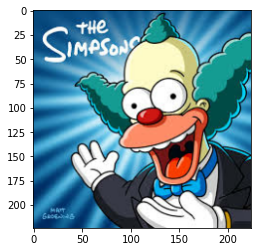

Predicted : krusty_the_clown


In [31]:
model_prediction(imag, ResNet50_model)

In [32]:
imag = "/content/lisa.png" #@param {type:"string"}


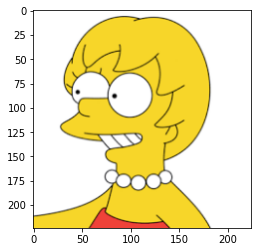

Predicted : lisa_simpson


In [33]:
model_prediction(imag, ResNet50_model)

In [34]:
imag = "/content/moe.jpg" #@param {type:"string"}


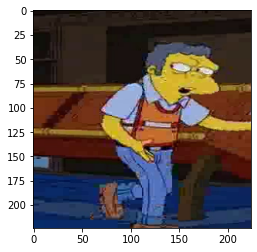

Predicted : moe_szyslak


In [35]:
model_prediction(imag, ResNet50_model)

In [36]:
imag = "/content/ned.jfif" #@param {type:"string"}


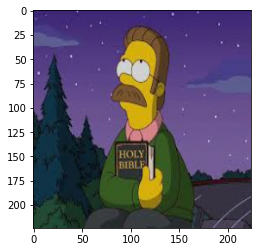

Predicted : ned_flanders


In [37]:
model_prediction(imag, ResNet50_model)